In [ ]:
!pip3 install torchvision

In [ ]:
# Local
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')

# Colab
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

import warnings
warnings.filterwarnings('ignore')

PyTorch version:[2.3.1].
device:[cpu].


## Multilayer Perceptron

### 데이터셋

In [1]:
from torchvision import datasets, transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2911611.79it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 137206.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 269795.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1637346.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


### 학습을 위한 데이터셋 생성


In [3]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_iter = torch.utils.data.DataLoader(
    mnist_test,
    batch_size=BATCH_SIZE,
    shuffle=True
)
print ("Done.")

Done.


In [13]:
# 데이터의 차원(Dimension) 확인
next(iter(train_iter))[0][0][0].size()

torch.Size([28, 28])

In [16]:
next(iter(train_iter))[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

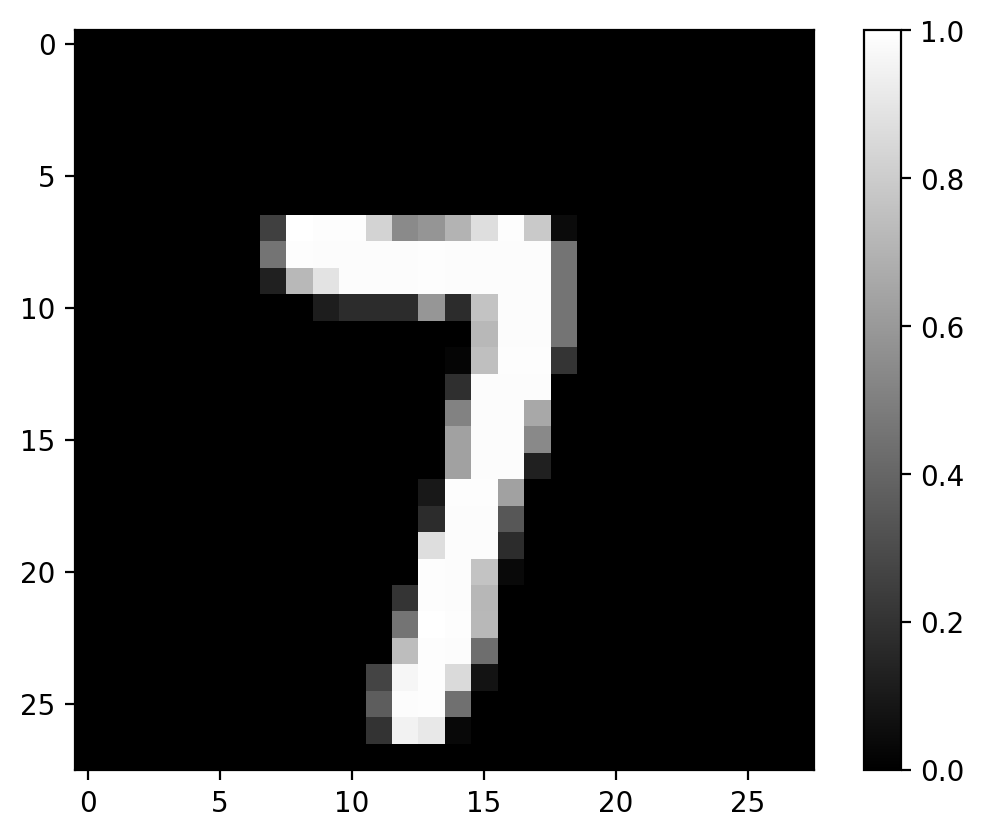

--------------------------------------------------
벡터화된 데이터: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

In [22]:
# 데이터 예시 출력
example = next(iter(train_iter))
example_x = example[0][0][0]
example_y = example[1][0]

plt.imshow(example_x, cmap='gray')
plt.colorbar()
plt.show()

print("-" * 50)
print(f"벡터화된 데이터: {example_x}")


print("-" * 50)
print(f"Label 데이터: {example_y}")

### MLP 모델 정의
- [MLP에 대한 간단한 예시](#https://m.blog.naver.com/samsjang/221030487369)

In [29]:
print(f"2차원 이미지의 차원: {example[0][0][0].size()}")
print(f"3차원 이미지의 차원: {example[0][0].size()}")
print(f"학습을 위해 배치 단위의 이미지 차원: {example[0].size()}")

2차원 이미지의 차원: torch.Size([28, 28])
3차원 이미지의 차원: torch.Size([1, 28, 28])
학습을 위해 배치 단위의 이미지 차원: torch.Size([256, 1, 28, 28])


In [31]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(
            # FILL IN HERE
            xdim, hdim
        )
        self.lin_2 = nn.Linear(
            # FILL IN HERE
            hdim, ydim
        )
        self.init_param() # initialize parameters

    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
print ("Done.")

Done.


### Forward Path

In [33]:
x_numpy = np.random.rand(2,784) # Batch_size x Input Dimension
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_numpy:\n",x_numpy)
print("-" * 50, '\n')

print ("x_torch:\n",x_torch)
print("-" * 50, '\n')

print ("y_torch:\n",y_torch)
print("-" * 50, '\n')

# 실제 예측된 Y값 --> label과 비교하여 학습을 수행하게 된다.
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.10803215 0.44308098 0.46630984 ... 0.81403813 0.23108862 0.91833483]
 [0.64499815 0.43465792 0.79664112 ... 0.67849003 0.45498419 0.85864596]]
-------------------------------------------------- 

x_torch:
 tensor([[0.1080, 0.4431, 0.4663,  ..., 0.8140, 0.2311, 0.9183],
        [0.6450, 0.4347, 0.7966,  ..., 0.6785, 0.4550, 0.8586]])
-------------------------------------------------- 

y_torch:
 tensor([[-0.7983, -0.8322, -0.3263,  0.4433,  0.4801, -0.2789,  0.2207,  1.0309,
         -0.7990,  0.6529],
        [-0.2323, -0.6293, -0.5947,  0.8727,  1.3163, -0.0749,  0.5062,  1.6043,
         -1.4950,  0.6023]], grad_fn=<AddmmBackward0>)
-------------------------------------------------- 

y_numpy:
 [[-0.7983255  -0.83217156 -0.3262992   0.44330078  0.48009312 -0.27890903
   0.22066796  1.0308754  -0.799028    0.6529293 ]
 [-0.23225284 -0.6292958  -0.59473264  0.87271833  1.3162822  -0.0749321
   0.506235    1.6042536  -1.4949701   0.6022879 ]]


In [40]:
# y=wx+b의 형태에 대해 각각의 w, b가 어떤 값을 가지고 있는 지 확인할 수 있다.
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.024  0.014  0.01   0.013 -0.096]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[-0.199 -0.019 -0.12   0.12  -0.034]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### 평가 및 학습되지 않은 상태에서의 평가
- `torch.no_grad()`: 학습을 위해 저장하는 gradient 값들(미분값)들을 평가에서는 사용하지 않기 때문에 no하겠다. 속도와 직접적인 관계가 있다.
- `model.eval()`: 평가 시에는 Dropout과 같은 방식을 사용하지 않는다. [Dropout 예시](https://heytech.tistory.com/127)
- MultilayerPerceptronClass가 Linear layer만을 활용하므로 평가 시에 1차원의 형태로 만들어줘야 한다. (CNN과 같은 예외 케이스가 있긴 하다.)

In [57]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        model.eval() # evaluate (affects DropOut and BN)
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_target = batch_out.to(device)
            model_pred = model(
                # FILL IN HERE
                batch_in.reshape(-1, 28*28)
            )
            _,y_pred = torch.max(model_pred.data,1)
            n_correct += (
                # FILL IN HERE
                y_pred == y_target
            ).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode
    return val_accr
print ("Done")

Done


In [58]:
# 초기화에 따른 성능을 보기 위해 ==> 재실행 해보기
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.087] test_accr:[0.080].


### 학습

In [59]:
print ("Start training.")
M.init_param() # initialize parameters
M.train()

loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(),lr=1e-3)

EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        # FILL IN HERE      # reset gradient
        optm.zero_grad()

        # FILL IN HERE      # backpropagate
        loss_out.backward()

        # FILL IN HERE      # optimizer update
        optm.step()

        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")

Start training.
epoch:[0] loss:[0.380] train_accr:[0.946] test_accr:[0.942].
epoch:[1] loss:[0.167] train_accr:[0.961] test_accr:[0.957].
epoch:[2] loss:[0.119] train_accr:[0.974] test_accr:[0.967].
epoch:[3] loss:[0.091] train_accr:[0.979] test_accr:[0.970].
epoch:[4] loss:[0.072] train_accr:[0.985] test_accr:[0.974].
epoch:[5] loss:[0.058] train_accr:[0.987] test_accr:[0.975].
epoch:[6] loss:[0.049] train_accr:[0.990] test_accr:[0.975].
epoch:[7] loss:[0.040] train_accr:[0.992] test_accr:[0.977].
epoch:[8] loss:[0.034] train_accr:[0.995] test_accr:[0.978].
epoch:[9] loss:[0.028] train_accr:[0.995] test_accr:[0.979].
Done


### 학습 후 평가

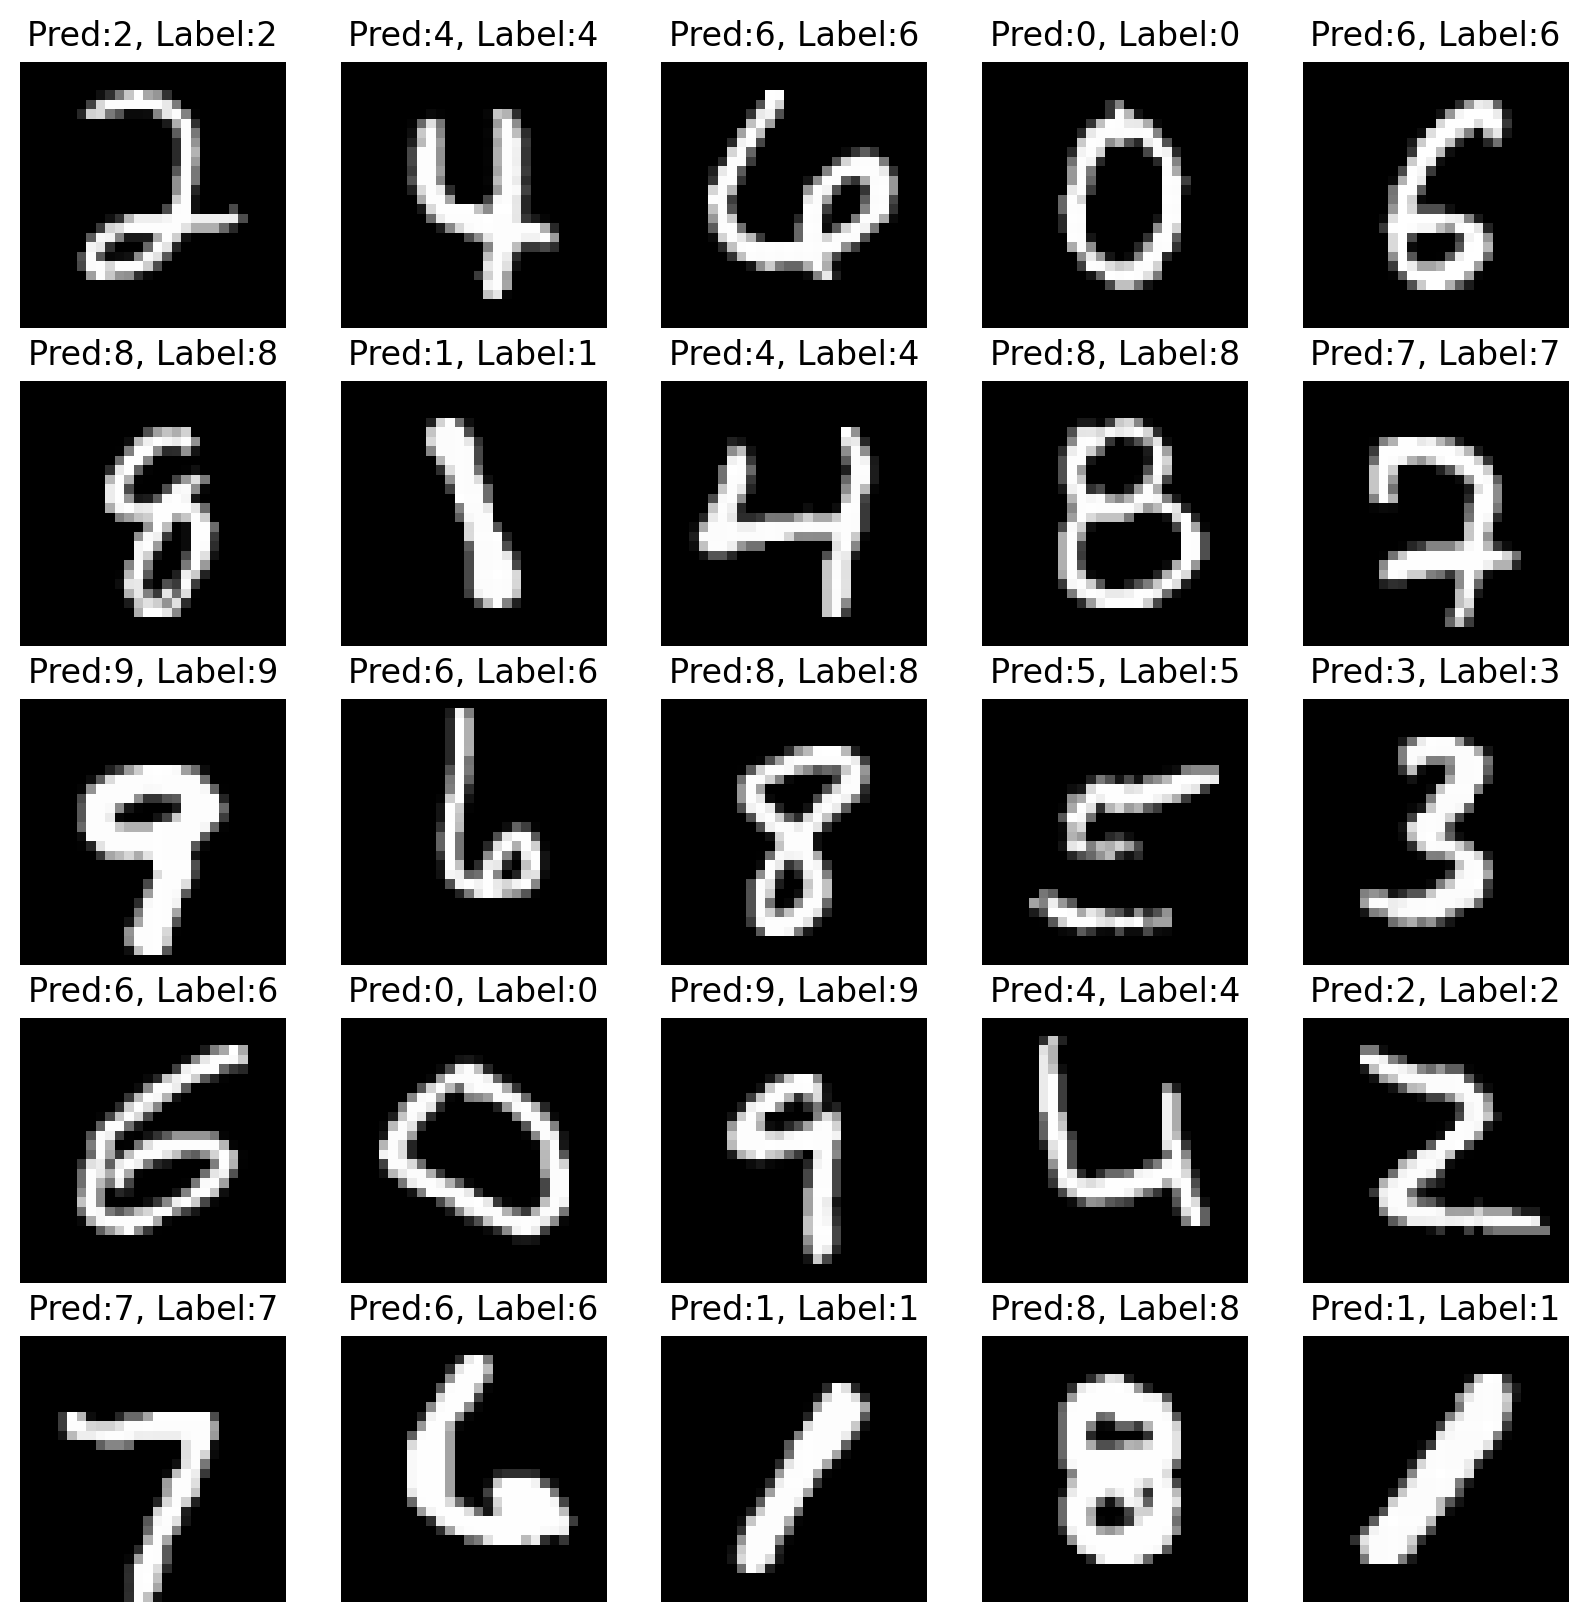

Done


In [60]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()
print ("Done")

## Word2Vec 예제

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x78d1f827d480>)

In [4]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
# 실험을 위해 데이터 셋 일부 샘플링
label_0_data = train_data[train_data['label'] == 0].sample(n=20000, random_state=42)
label_1_data = train_data[train_data['label'] == 1].sample(n=20000, random_state=42)
train_data = pd.concat([label_0_data, label_1_data], axis=0)
train_data.reset_index(drop=True, inplace=True)

In [6]:
print(len(train_data)) # 리뷰 개수 출력

40000


In [7]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [8]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [9]:
print(len(train_data)) # 리뷰 개수 출력

39997


In [10]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 39997/39997 [03:22<00:00, 197.58it/s]


리뷰의 최대 길이 : 93
리뷰의 평균 길이 : 12.345250893817036


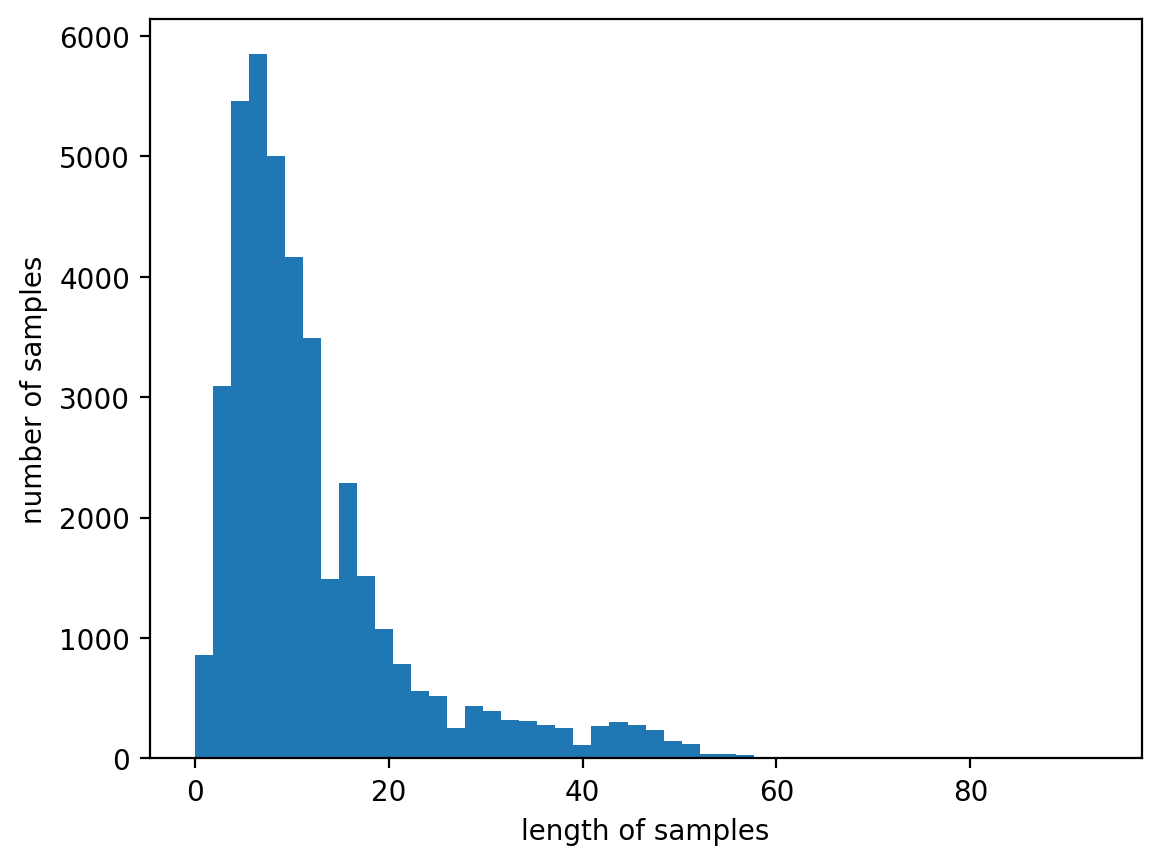

In [12]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
from gensim.models import Word2Vec

# 데이터의 개수를 줄였다 보니 학습이 잘 안되었을 수 있다.
model = Word2Vec(
    sentences = tokenized_data,
    vector_size = 100,
    window = 5,
    min_count = 5 # 5번 이상 나타난 단어들에 한하여 학습한다.
)

In [14]:
model.wv.vectors.shape

(6908, 100)

In [15]:
print(tokenized_data[1])
# 예시 데이터1: ['액션', '싸우다', '전투', '추격', '폭발']
# 예시 데이터2: ['로맨스', '사랑', '연인', '데이트']

['박상원', '아저씨', '왜', '그렇다', '.']


In [39]:
example_word = "액션"
if example_word in model.wv:
    word_vector = model.wv[example_word]
    print(f"단어: {example_word}\n벡터: {word_vector[:10]}")
else:
    print(f"{example_word}가 존재하지 않습니다.")

단어: 액션
벡터: [-0.02474611  0.07672615 -0.7290209   0.36697826 -0.36714616 -0.6563622
  0.60307705  0.0141594  -0.45656294 -0.6799642 ]


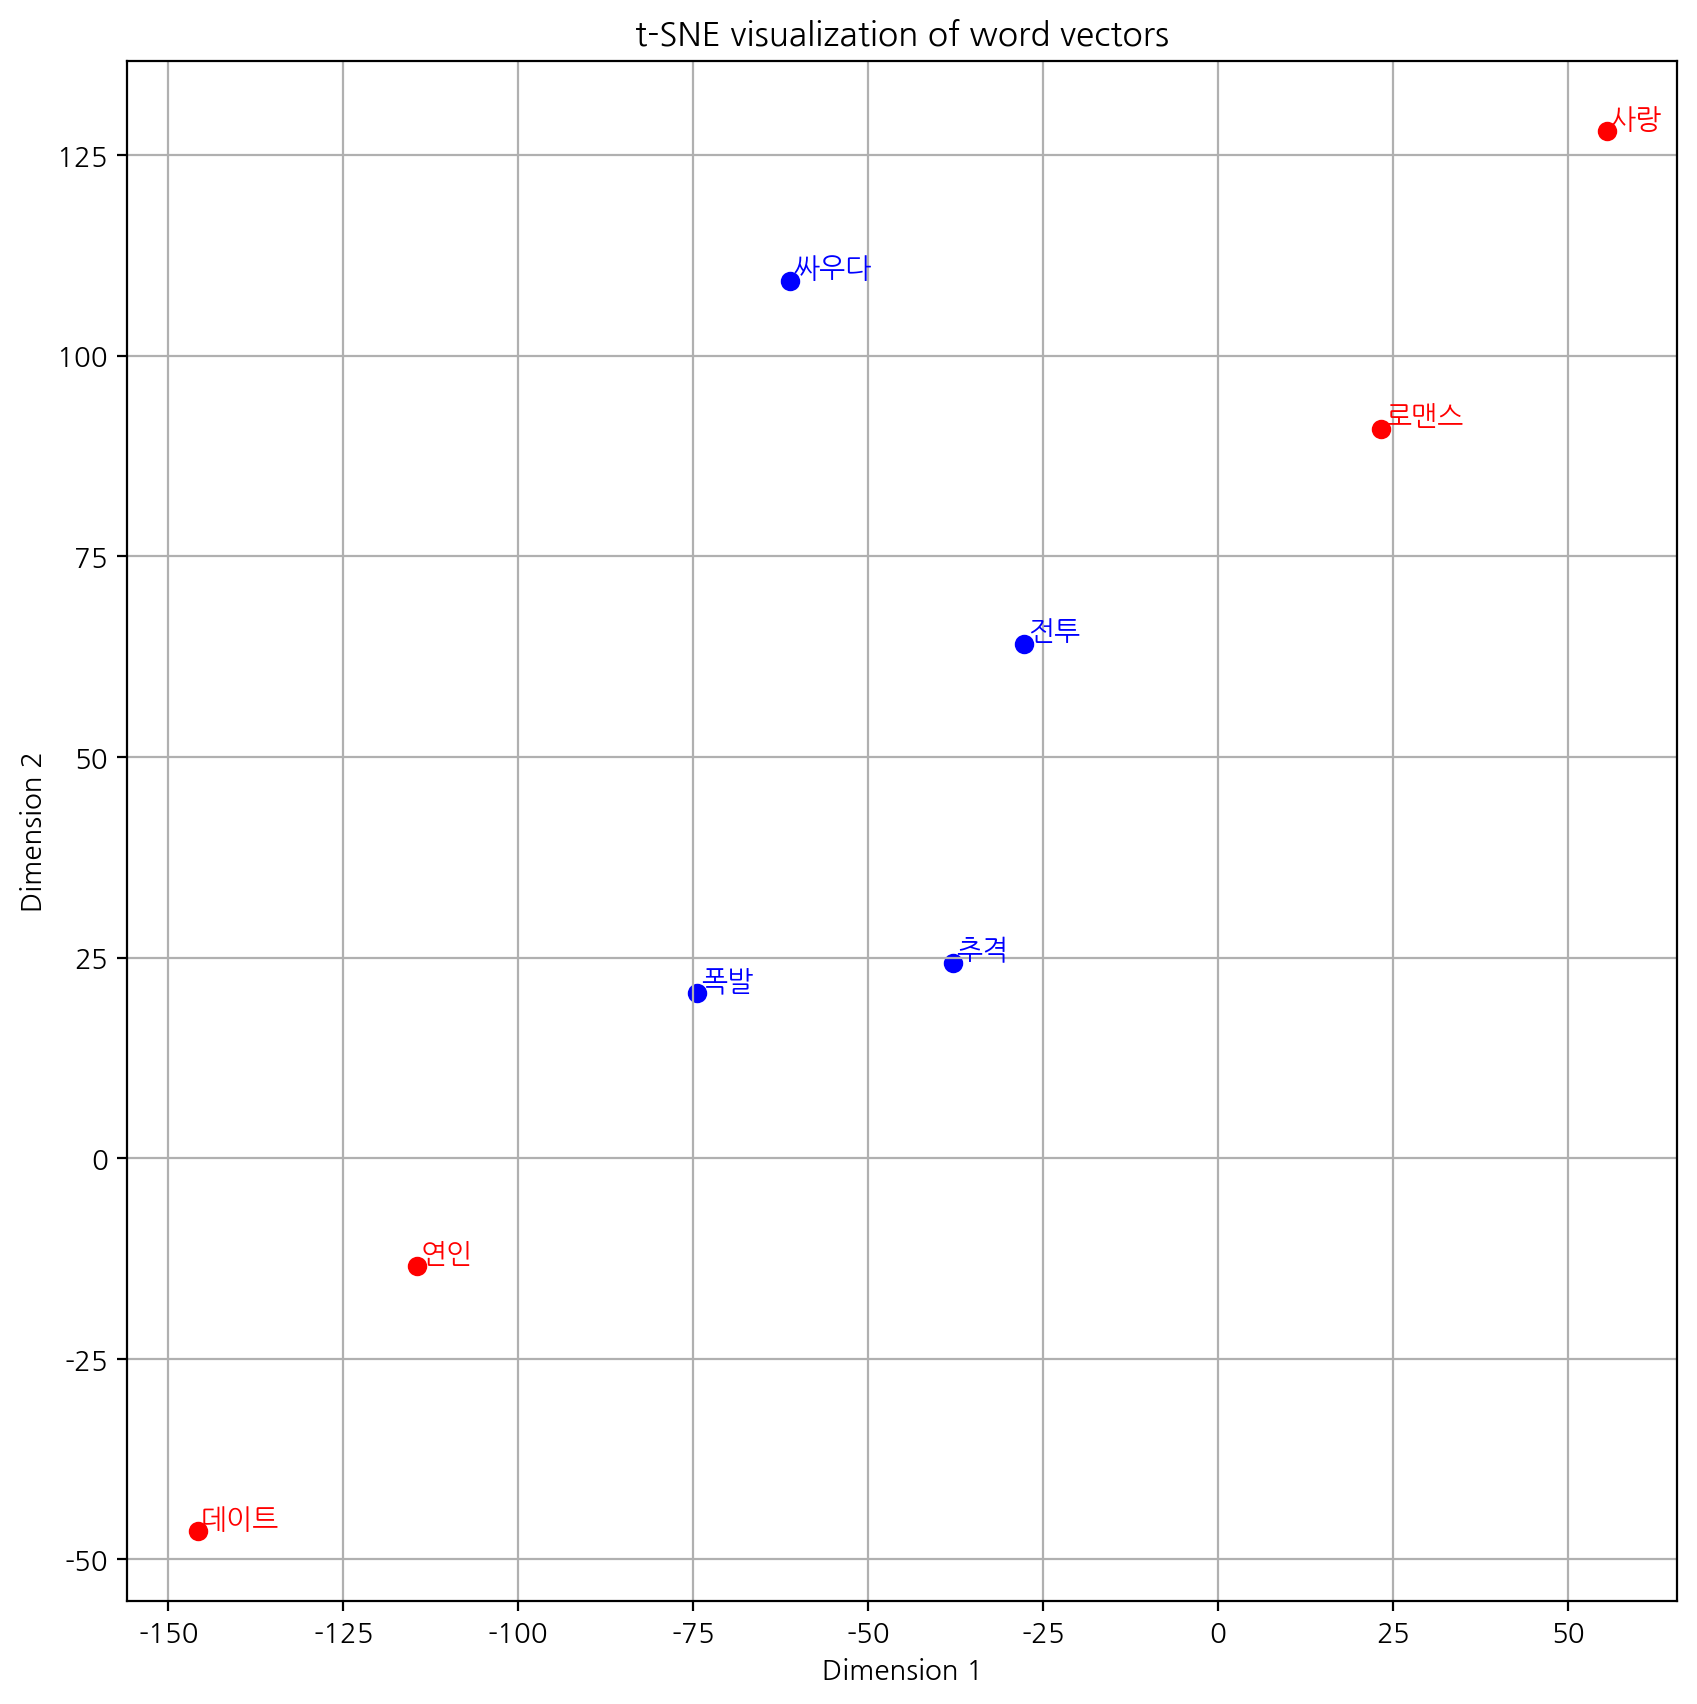

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 단어 목록
group1 = ['싸우다', '전투', '추격', '폭발']
group2 = ['로맨스', '사랑', '연인', '데이트']

# 벡터 추출
group1_word_vectors = np.array([model.wv[word] for word in group1 if word in model.wv])
group2_word_vectors = np.array([model.wv[word] for word in group2 if word in model.wv])

# 모든 단어 벡터 합치기
all_word_vectors = np.vstack((group1_word_vectors, group2_word_vectors))

# t-SNE를 사용하여 2차원으로 차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
all_word_vectors_2d = tsne.fit_transform(all_word_vectors)

# 시각화
plt.figure(figsize=(10, 10))

# group1 단어 시각화
for i, word in enumerate(group1):
    if word in model.wv:  # 모델 어휘에 있는 단어만 시각화
        plt.scatter(all_word_vectors_2d[i, 0], all_word_vectors_2d[i, 1], color='blue')
        plt.annotate(word, (all_word_vectors_2d[i, 0] + 0.5, all_word_vectors_2d[i, 1] + 0.5), color='blue')

# group2 단어 시각화
for i, word in enumerate(group2):
    if word in model.wv:  # 모델 어휘에 있는 단어만 시각화
        plt.scatter(all_word_vectors_2d[len(group1) + i, 0], all_word_vectors_2d[len(group1) + i, 1], color='red')
        plt.annotate(word, (all_word_vectors_2d[len(group1) + i, 0] + 0.5, all_word_vectors_2d[len(group1) + i, 1] + 0.5), color='red')

plt.title('t-SNE visualization of word vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## RNN 실습

In [14]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### RNN(LSTM) 모델 정의

In [4]:
class RecurrentNeuralNetworkClass(nn.Module):
    def __init__(self,name='rnn',xdim=28,hdim=256,ydim=10,n_layer=3):
        super(RecurrentNeuralNetworkClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.n_layer = n_layer # K

        self.rnn = nn.LSTM(
            input_size=self.xdim,
            hidden_size=self.hdim,
            num_layers=self.n_layer,
            batch_first=True
        )
        self.lin = nn.Linear(self.hdim, self.ydim)

    def forward(self,x):
        # Set initial hidden and cell states
        h0 = torch.zeros(
            # FILL IN HERE
            self.n_layer,
            x.size(0),
            self.hdim
        ).to(device)
        c0 = torch.zeros(
            # FILL IN HERE
            self.n_layer,
            x.size(0),
            self.hdim
        ).to(device)

        # RNN
        rnn_out,(hn,cn) = self.rnn(x, (h0,c0))
        # x:[N x L x Q] => rnn_out:[N x L x D]
        # Linear
        out = self.lin(
            # FILL IN HERE
            rnn_out[:, -1, :]
            ).view([-1,self.ydim])
        return out

R = RecurrentNeuralNetworkClass(
    name='rnn',xdim=28,hdim=256,ydim=10,n_layer=2).to(device)
print ("Done.")

Done.


- `N`: 배치 크기
- `L`: 입력 길이 (여기서는 이미지이므로 이미지의 x축의 길이 = 28)
- `Q`: 각 입력의 차원 (28개의 입력에 대한 차원, 여기서는 y축의 길이 = 28)
- `K`: Layer의 개수 x 
- `D`: Hidden Layer의 차원

` Y,(hn,cn) = LSTM(X) `

- `X`: [N x L x Q] - 배치 크기 x 입력 길이 x 입력 데이터의 차원 (256 x 28 x 28)
- `Y`: [N x L x D] - 배치 크기 x 입력 길이 x Hidden Layer의 차원 (256 x 28 x 256)
- `hn`: [K x N x D] - Layer의 개수 x 배치 크기 x Hidden Layer의 차원 (2 x 256 x 256)
- `cn`: [K x N x D] - Layer의 개수 x 배치 크기 x Hidden Layer의 차원 (2 x 256 x 256)

In [5]:
np.set_printoptions(precision=3)
torch.set_printoptions(precision=3)

# 예제: 입력 데이터의 차원: 2 x 20 x 28
x_numpy = np.random.rand(2,20,28) # [N x L x Q]
x_torch = torch.from_numpy(x_numpy).float().to(device)
rnn_out,(hn,cn) = R.rnn(x_torch) # forward path

print ("rnn_out:",rnn_out.shape) # [N x L x D]
print ("Hidden State hn:",hn.shape) # [K x N x D]
print ("Cell States cn:",cn.shape) # [K x N x D]

rnn_out: torch.Size([2, 20, 256])
Hidden State hn: torch.Size([2, 2, 256])
Cell States cn: torch.Size([2, 2, 256])


In [9]:
R

RecurrentNeuralNetworkClass(
  (rnn): LSTM(28, 256, num_layers=2, batch_first=True)
  (lin): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
# LSTM의 특성상 4개의 게이트가 존재하여 256x4 = 1024이다.
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(R.named_parameters()):
    if param.requires_grad:
        param_numpy = param.detach().cpu().numpy() # to numpy array 
        n_param += len(param_numpy.reshape(-1))
        print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
        print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[rnn.weight_ih_l0] shape:[(1024, 28)].
    val:[ 0.035  0.005  0.039 -0.026  0.05 ]
[1] name:[rnn.weight_hh_l0] shape:[(1024, 256)].
    val:[-0.003 -0.027 -0.023  0.022 -0.05 ]
[2] name:[rnn.bias_ih_l0] shape:[(1024,)].
    val:[-0.007  0.025  0.008  0.047 -0.015]
[3] name:[rnn.bias_hh_l0] shape:[(1024,)].
    val:[ 0.032  0.045 -0.042 -0.035  0.05 ]
[4] name:[rnn.weight_ih_l1] shape:[(1024, 256)].
    val:[-0.011 -0.034  0.048 -0.053  0.055]
[5] name:[rnn.weight_hh_l1] shape:[(1024, 256)].
    val:[-0.001 -0.019 -0.052 -0.048  0.019]
[6] name:[rnn.bias_ih_l1] shape:[(1024,)].
    val:[ 0.055  0.021  0.045 -0.013 -0.022]
[7] name:[rnn.bias_hh_l1] shape:[(1024,)].
    val:[-0.033 -0.044  0.027 -0.053  0.043]
[8] name:[lin.weight] shape:[(10, 256)].
    val:[-0.041  0.009 -0.     0.036 -0.049]
[9] name:[lin.bias] shape:[(10,)].
    val:[-0.056  0.037  0.024 -0.043  0.016]
Total number of parameters:[821,770].


### Forward Path

In [11]:
np.set_printoptions(precision=3)
torch.set_printoptions(precision=3)

# Forward를 위한 예시 데이터
x_numpy = np.random.rand(3,10,28) # [N x L x Q]
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = R.forward(x_torch) # [N x 1 x R] where R is the output dim.
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array

print ("x_numpy %s"%(x_numpy.shape,))
print ("y_numpy %s"%(y_numpy.shape,))

x_numpy (3, 10, 28)
y_numpy (3, 10)


### 평가 및 학습되지 않은 상태에서의 평가

In [18]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        n_total,n_correct = 0,0
        model.eval() # evaluate (affects DropOut and BN)
        for batch_in,batch_out in data_iter:
            y_target = batch_out.to(device)
            
            # Image형태의 데이터이기 때문에 28x28이 아닌 1x28x28로 구성되어 있다.
            model_pred = model.forward(batch_in.view(-1,28,28).to(device))
            
            # 0~9 중에서 가장 높은 값을 가지는 index를 선택한다. (예측 클래스)
            _,y_pred = torch.max(model_pred,1)

            # 정확도 계산
            n_correct += (y_pred==y_target).sum().item()
            n_total += batch_in.size(0)

        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
        
    return val_accr
print ("Done")

Done


In [19]:
train_accr = func_eval(R, train_iter, device)
test_accr = func_eval(R, test_iter, device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.104] test_accr:[0.103].


### 학습

In [28]:
print ("Start training.")

loss = nn.CrossEntropyLoss()
optm = optim.Adam(R.parameters(),lr=1e-3)

R.train() # to train mode 
EPOCHS,print_every = 5,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = R.forward(batch_in.view(-1,28,28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        optm.zero_grad() # reset gradient 
        loss_out.backward() # backpropagate
        optm.step() # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(R,train_iter,device)
        test_accr = func_eval(R,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")

Start training.
epoch:[0] loss:[0.230] train_accr:[0.956] test_accr:[0.957].
epoch:[1] loss:[0.110] train_accr:[0.975] test_accr:[0.974].
epoch:[2] loss:[0.074] train_accr:[0.984] test_accr:[0.982].
epoch:[3] loss:[0.056] train_accr:[0.988] test_accr:[0.983].
epoch:[4] loss:[0.044] train_accr:[0.990] test_accr:[0.986].
Done


### 학습 후 평가

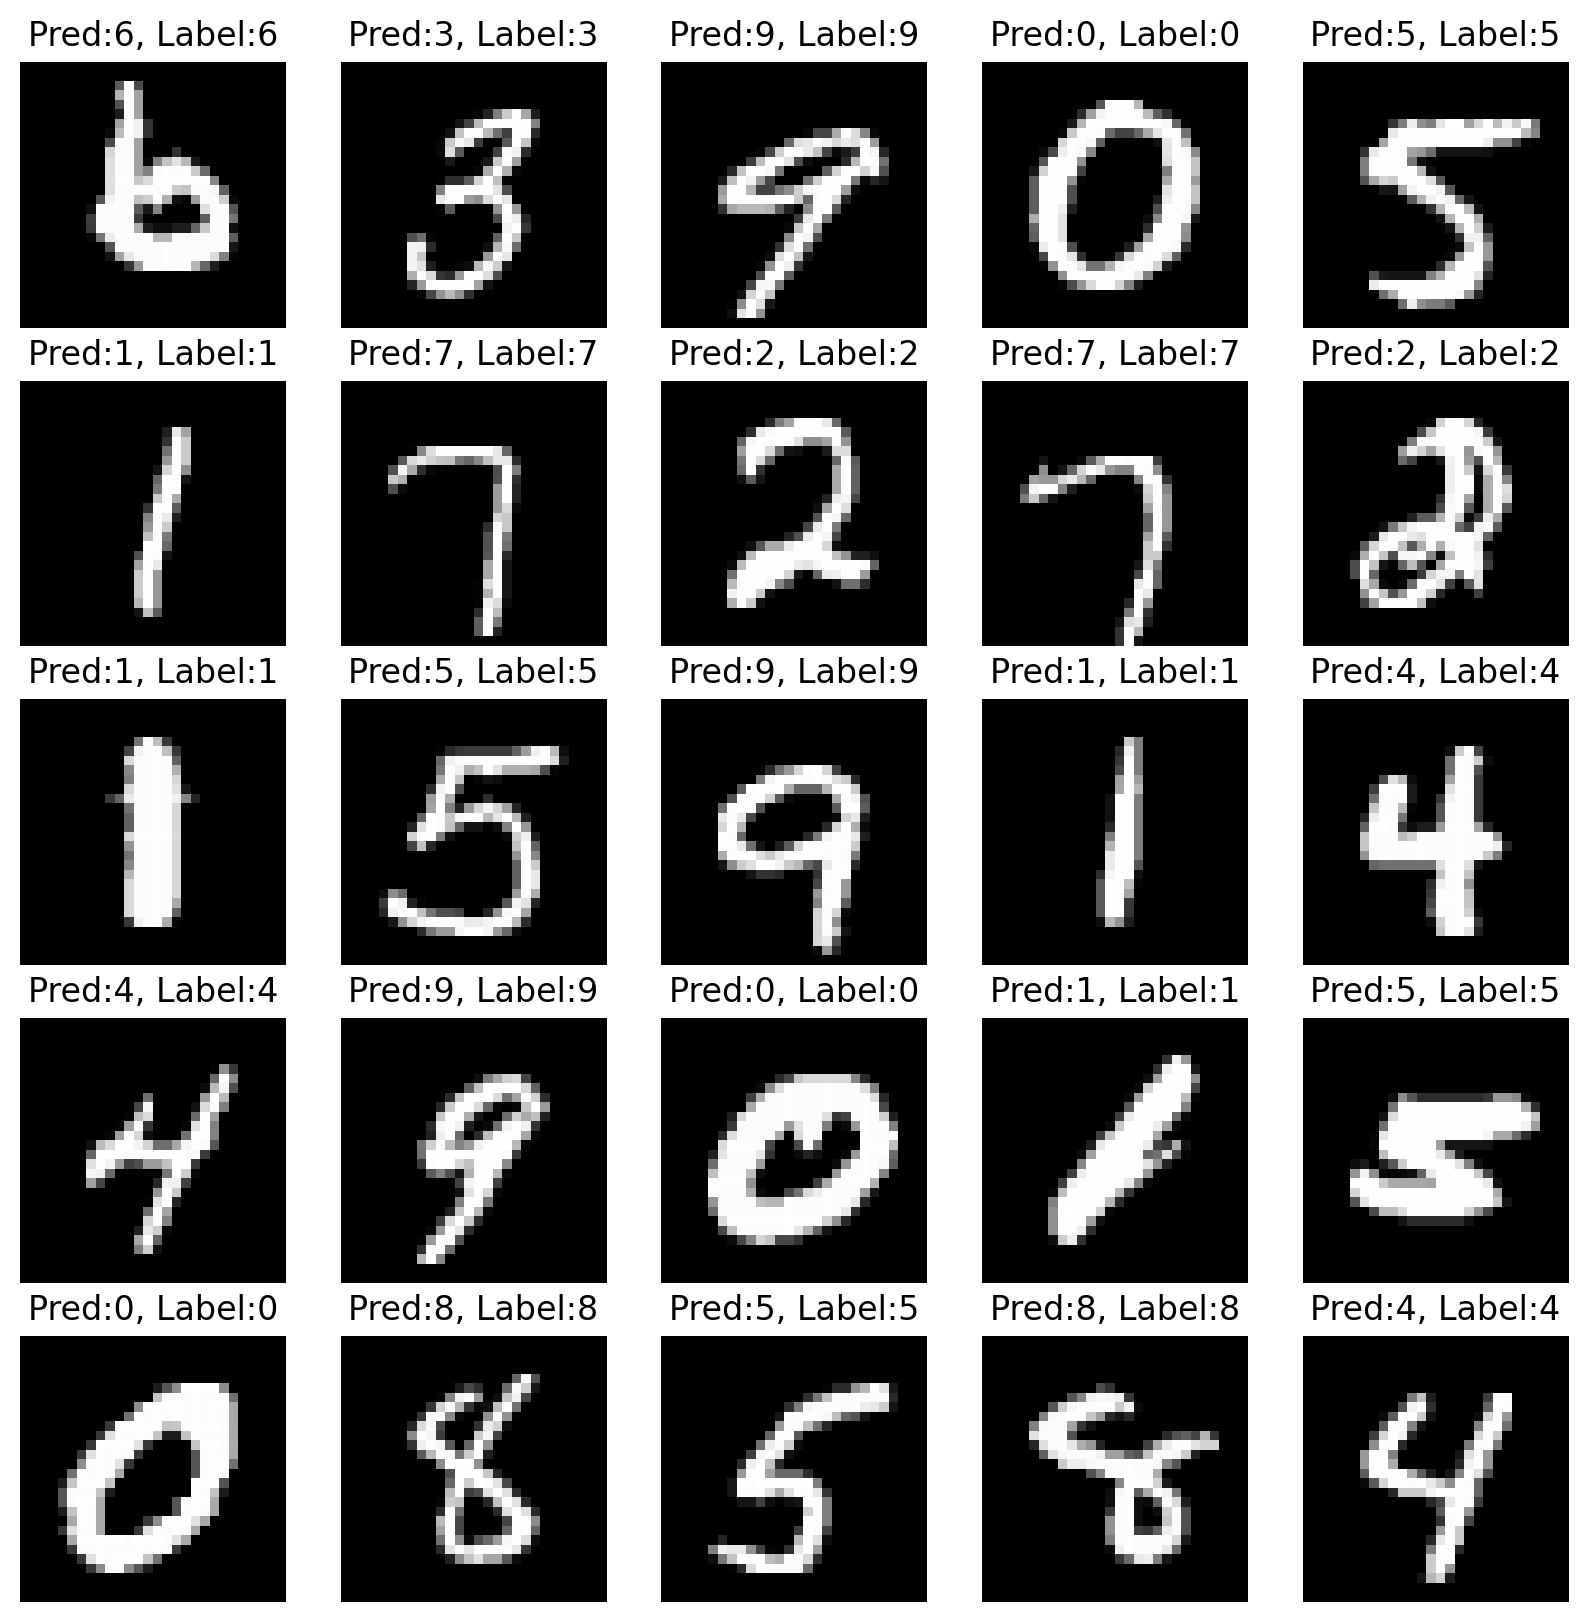

Done


In [29]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets),n_sample,replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    R.eval() # to evaluation mode 
    y_pred = R.forward(test_x.view(-1,28,28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()
print ("Done")

## Transformer and Multi-Head Attention
- (출처: [Google Colab](https://colab.research.google.com/github/PytorchLightning/lightning-tutorials/blob/publication/.notebooks/course_UvA-DL/05-transformers-and-MH-attention.ipynb))

### Self-Attention의 이해
- Query와 Key를 활용하여 가중치를 구합니다. (같은 행렬을 곱합으로써 가중치 획득)
- 얻어진 가중치를 다시 한번 Value에 곱 연산을 수행합니다. (구해진 가중치를 같은 행렬에 다시 곱)

![image-2.png](attachment:image-2.png)            ![image.png](attachment:image.png) ![image-3.png](attachment:image-3.png)

- Q_animal과 K_it을 연산하게 되면 0.8과 같은 값을 가진다.
- Q_street과 K_it을 연산하게 되면 0.5와 같은 값을 가진다.
- [0.8, 0.5, ...]을 V_it과 곱하여 최종 연산되어 Matrix값을 가진다.

- Scaled Dot-Product Attention

![image.png](attachment:image.png)

### Multi Head Attention

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

#### Scaled Dot-Product Attention (SDPA)
- Data $X \in \mathbb{R}^{n \times d}$ => N은 데이터의 개수, d는 데이터의 차원 (벡터화)
- Query and Key $Q, K \in \mathbb{R}^{n \times d_K}$ 
- Value $V \in \mathbb{R}^{n \times d_V} $

$\text{Attention}(Q,K,V) = \text{softmax} \left( \frac{QK^T}{\sqrt{d_K}} \right)V \in \mathbb{R}^{n \times d_V} $

In [ ]:
class ScaledDotProductAttention(nn.Module):
    
    # GPT는 mask를 사용한다. (앞만 attend 할 수 있다.)
    def forward(self, Q, K, V, mask=None):
        d_K = K.size()[-1] # key dimension
        
        # FILL IN HERE
        scores = Q.matmul(K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_K, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask==0, -1e9)

        attention = F.softmax(scores,dim=-1)
        out = attention.matmul(V)
        return out, attention


In [ ]:
# Demo run of scaled dot product attention 
SDPA = ScaledDotProductAttention()
n_batch, d_K, d_V = 3, 128, 256 # K의 Hidden 차원과 Value의 Hidden 차원은 반드시 동일할 필요는 없습니다.
n_Q, n_K, n_V = 30, 50, 50
Q = torch.rand(n_batch, n_Q, d_K)
K = torch.rand(n_batch, n_K, d_K)
V = torch.rand(n_batch, n_V, d_V)
out, attention = SDPA.forward(Q, K, V, mask=None)
def sh(x): 
       """텍스트 형태로 shape을 출력하기 위해 활용"""
       return str(x.shape)[11:-1] 
print ("SDPA: Q%s K%s V%s => out%s attention%s"%
       (sh(Q),sh(K),sh(V),sh(out),sh(attention)))

# Multi-Head Attention => 앙상블의 효과
n_batch, n_head, d_K, d_V = 3, 5, 128, 256
n_Q,n_K,n_V = 30, 50, 50 # n_K and n_V should be the same
Q = torch.rand(n_batch, n_head, n_Q, d_K)
K = torch.rand(n_batch, n_head, n_K, d_K)
V = torch.rand(n_batch, n_head, n_V, d_V)
out, attention = SDPA.forward(Q, K, V, mask=None)
# out: [n_batch x n_head x n_Q x d_V]
# attention: [n_batch x n_head x n_Q x n_K] 
def sh(x): 
       return str(x.shape)[11:-1] 
print ("(Multi-Headed) SDPA: Q%s K%s V%s => out%s attention%s"%
       (sh(Q),sh(K),sh(V),sh(out),sh(attention)))

#### Multi-Head Attention (MHA)

$\text{head}_{\color{red}i} = \text{Attention}(Q {\color{green}W}^Q_{\color{red}i},K {\color{green}W}^K_{\color{red}i}, V {\color{green}W}^V_{\color{red}i}) $

In [ ]:
class MultiHeadedAttention(nn.Module):
    def __init__(self,d_feat=128,n_head=5,actv=F.relu,USE_BIAS=True,dropout_p=0.1,device=None):
        """
        d_feat: 특징 차원
        n_head: 헤드의 개수 (헤드가 많을 수록 앙상블의 효과)
        actv: 각 Linear Layer 이후에 비선형 함수 적용 (Activation Function)
        USE_BIAS: bias 항의 사용 여부
        dropout_p: Dropout 확률 (학습 시 앙상블의 효과 및 과적합 방지를 위해 랜덤한 노드들을 P의 확률로 Off)
        device: 학습시킬 디바이스 (ex, cuda or cpu)
        """
        super(MultiHeadedAttention,self).__init__()
        if (d_feat%n_head) != 0:
            raise ValueError("d_feat(%d) should be divisible by b_head(%d)"%(d_feat,n_head)) 
        self.d_feat = d_feat
        self.n_head = n_head
        
        # 여기서 알 수 있다시피 하나의 긴 Attention 대신, 짧고 여러 개의 Attention을 사용한다.
        self.d_head = self.d_feat // self.n_head 
        self.actv = actv
        self.USE_BIAS = USE_BIAS
        self.dropout_p = dropout_p # prob. of zeroed

        # 결국, Q, K, V는 동일한 형태를 가지도록 만든다.
        # 하지만, 서로 다른 형태여도 괜찮다. 다만, Q, K의 Hidden 차원이 동일해야하고, K, V의 길이 차원이 동일해야 한다.
        self.lin_Q = nn.Linear(self.d_feat, self.d_feat, self.USE_BIAS)
        self.lin_K = nn.Linear(self.d_feat, self.d_feat, self.USE_BIAS)
        self.lin_V = nn.Linear(self.d_feat, self.d_feat, self.USE_BIAS)
        self.lin_O = nn.Linear(self.d_feat, self.d_feat, self.USE_BIAS)

        self.dropout = nn.Dropout(p=self.dropout_p)
    
    def forward(self, Q, K, V, mask=None):
        """
        Q: [n_batch, n_Q, d_feat]
        K: [n_batch, n_K, d_feat]
        V: [n_batch, n_V, d_feat] <= n_K and n_V must be the same (K와 V의 길이 차원은 동일해야 한다.)
        """
        n_batch = Q.shape[0]
        Q_feat = self.lin_Q(Q) 
        K_feat = self.lin_K(K) 
        V_feat = self.lin_V(V)
        # Q_feat: [n_batch, n_Q, d_feat]
        # K_feat: [n_batch, n_K, d_feat]
        # V_feat: [n_batch, n_V, d_feat]

        # 기존에 1개짜리 Q, K, V를 N개의 Head로 분리한다. (d_feat = n_head*d_head)
        Q_split = Q_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        K_split = K_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        V_split = V_feat.view(n_batch, -1, self.n_head, self.d_head).permute(0, 2, 1, 3)
        # Q_split: [n_batch, n_head, n_Q, d_head]
        # K_split: [n_batch, n_head, n_K, d_head]
        # V_split: [n_batch, n_head, n_V, d_head]

        # Multi-Headed Attention
        d_K = K.size()[-1] # key dimension
        scores = Q_split.matmul(K_split.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_K, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask==0,-1e9)
        attention = torch.softmax(scores,dim=-1)
        x_raw = torch.matmul(self.dropout(attention),V_split) # dropout is NOT mentioned in the paper
        # attention: [n_batch, n_head, n_Q, n_K]
        # x_raw: [n_batch, n_head, n_Q, d_head]

        # Reshape x => Multi-Head로 쪼개져서 연산된 결과를 1개로 통합한다.
        x_rsh1 = x_raw.permute(0,2,1,3).contiguous()
        # x_rsh1: [n_batch, n_Q, n_head, d_head]
        x_rsh2 = x_rsh1.view(n_batch,-1,self.d_feat)
        # x_rsh2: [n_batch, n_Q, d_feat]

        # Linear
        x = self.lin_O(x_rsh2)
        # x: [n_batch, n_Q, d_feat]
        out = {'Q_feat':Q_feat,'K_feat':K_feat,'V_feat':V_feat,
               'Q_split':Q_split,'K_split':K_split,'V_split':V_split,
               'scores':scores,'attention':attention,
               'x_raw':x_raw,'x_rsh1':x_rsh1,'x_rsh2':x_rsh2,'x':x}
        return out

# Self-Attention Layer
n_batch = 128   # 배치 크기
n_src   = 32    # 입력 길이
d_feat  = 200   # Hidden 차원
n_head  = 5     # Head의 개수
src = torch.rand(n_batch, n_src, d_feat) # 배치 크기 x 입력 길이 x Hidden 차원
self_attention = MultiHeadedAttention(
    d_feat=d_feat,
    n_head=n_head,
    actv=F.relu,
    USE_BIAS=True,
    dropout_p=0.1,
    device=device
)
out = self_attention.forward(src, src, src, mask=None)

Q_feat,K_feat,V_feat = out['Q_feat'],out['K_feat'],out['V_feat']
Q_split,K_split,V_split = out['Q_split'],out['K_split'],out['V_split']
scores,attention = out['scores'],out['attention']
x_raw,x_rsh1,x_rsh2,x = out['x_raw'],out['x_rsh1'],out['x_rsh2'],out['x']

# Print out shapes
def sh(_x): return str(_x.shape)[11:-1] 
print ("Input src:\t%s  \t= [n_batch, n_src, d_feat]"%(sh(src)))
print ()
print ("Q_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(Q_feat)))
print ("K_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(K_feat)))
print ("V_feat:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(V_feat)))
print ()
print ("Q_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(Q_split)))
print ("K_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(K_split)))
print ("V_split:  \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(V_split)))
print ()
print ("scores:   \t%s  \t= [n_batch, n_head, n_src, n_src]"%(sh(scores)))
print ("attention:\t%s  \t= [n_batch, n_head, n_src, n_src]"%(sh(attention)))
print ()
print ("x_raw:    \t%s  \t= [n_batch, n_head, n_src, d_head]"%(sh(x_raw)))
print ("x_rsh1:   \t%s  \t= [n_batch, n_src, n_head, d_head]"%(sh(x_rsh1)))
print ("x_rsh2:   \t%s  \t= [n_batch, n_src, d_feat]"%(sh(x_rsh2)))
print ()
print ("Output x: \t%s  \t= [n_batch, n_src, d_feat]"%(sh(x)))